### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Data

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


we don't have any missing value

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.shape

(768, 9)

In [9]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


#
### Data Understanding and Preprocessing

In [11]:
# 1) checking duplicate
df.duplicated().sum() 

0

In [12]:
# 2) checking 0 values 
(df[df.columns] == 0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

afetr searching , i found that 0 values not valid in (Glucose, BMI, Insulin, BloodPressure),
so, should replace it with any way from (mean, median, random of 'Normal Medical  values')

#### This information using chatgpt: 
#### and link for chatting is: https://chatgpt.com/share/20286c5e-6b7e-4523-a18b-9eade23bb8f8


In [14]:
import random

df["Glucose"].replace(0, random.randint(70, 99),inplace = True) # random value from Normal values
df["BMI"].replace(0,random.uniform(18.5, 24.9),inplace = True) # random value from Normal values
df["Insulin"].replace(0,random.randint(2, 25),inplace = True) # random value from Normal values


C:\Users\zas\AppData\Local\Temp\ipykernel_7160\4057438368.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Glucose"].replace(0, random.randint(70, 99),inplace = True) # random value from Normal values
C:\Users\zas\AppData\Local\Temp\ipykernel_7160\4057438368.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

##### about BloodPressure in real we have 2 values (high, low) so can't use random from normal values so will use median

In [16]:
df['BloodPressure'].replace({0:df['BloodPressure'].median()},inplace = True)

C:\Users\zas\AppData\Local\Temp\ipykernel_7160\2223893625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BloodPressure'].replace({0:df['BloodPressure'].median()},inplace = True)


In [17]:
(df[df.columns] == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.35026,72.386719,20.536458,86.130208,32.285956,0.471876,33.240885,0.348958
std,3.369578,30.71887,12.096642,15.952218,110.958377,7.021014,0.331329,11.760232,0.476951
min,0.000000,44.00000,24.000000,0.000000,13.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.00000,64.000000,0.000000,13.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.00000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.25000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.00000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#
### Outlier Analysis

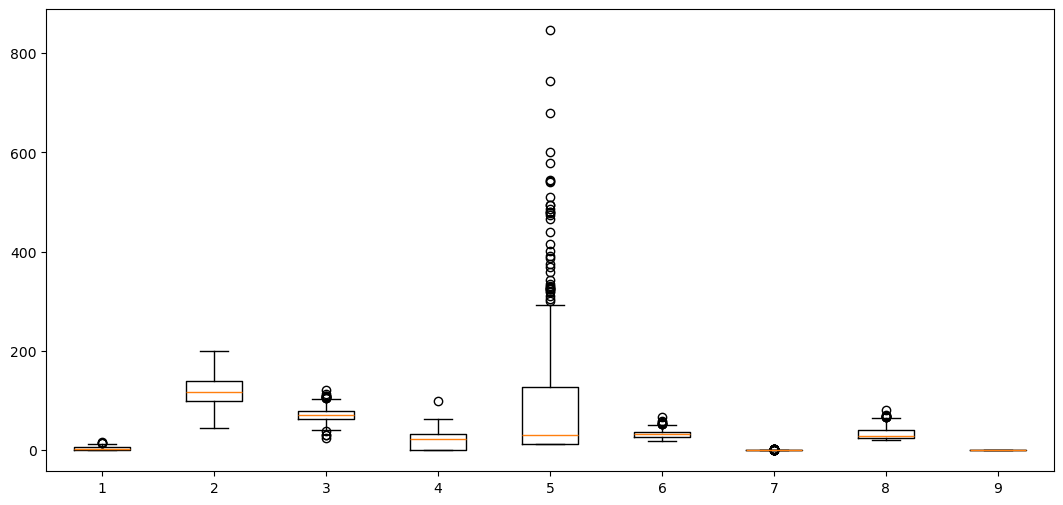

In [20]:
plt.figure(figsize=(13,6))
plt.boxplot(df)
plt.show()

##### This is a big outlier problem in a (Insulin) col

quantile way does not work will so will useing the real values: 

In [22]:

q1=df['Insulin'].quantile(0.25)
q3=df['Insulin'].quantile(0.75)
IQR=q3-q1
outliers = df[((df[['Insulin']]<(q1-1.5*IQR)) | (df['Insulin']>(q3+1.5*IQR)))]
print(q1, "low: ", ((q1-1.5)*IQR))
print(q3, "high: ", ((q3+1.5)*IQR))
outliers['Insulin'].values
outliers.shape

13.0 low:  1313.875
127.25 high:  14709.6875


(768, 9)

 quantile way does not work will so will use the real values:
 for this site and chatgpt,
https://www.sciencedirect.com/topics/immunology-and-microbiology/insulin-level,
found that the normal values between (5,150), and if a person has something this values will be more 150 or less than 5.

##### so, from my opinion i see to change all values that more than (160) and less that (2) to a median(2:160) or random value from(5,160)

In [24]:
l = df[(df[['Insulin']] < 2) | (df[['Insulin']] > 160)]
a = l['Insulin'].dropna().values
a

array([168., 543., 846., 175., 230., 235., 245., 192., 207., 240., 300.,
       342., 304., 270., 176., 228., 220., 495., 175., 168., 225., 325.,
       284., 204., 485., 285., 495., 210., 318., 190., 280., 175., 271.,
       478., 190., 744., 370., 192., 176., 194., 680., 402., 258., 375.,
       278., 545., 220., 182., 194., 360., 215., 184., 180., 205., 231.,
       168., 255., 171., 167., 249., 325., 293., 465., 325., 182., 285.,
       196., 415., 275., 165., 579., 176., 310., 167., 474., 170., 210.,
       277., 180., 180., 210., 237., 191., 328., 250., 480., 265., 193.,
       170., 210., 165., 326., 188., 210., 215., 190., 225., 207., 166.,
       215., 274., 165., 330., 600., 230., 185., 293., 272., 182., 194.,
       321., 183., 440., 540., 200., 231., 190., 168., 240., 265., 205.,
       180., 180., 480., 200., 335., 387., 291., 392., 185., 178., 200.,
       180., 165., 200., 510., 180.])

In [25]:
for i in a:
    df['Insulin'].replace(i, random.randint(5, 160),inplace = True) 

C:\Users\zas\AppData\Local\Temp\ipykernel_7160\2096961930.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Insulin'].replace(i, random.randint(5, 160),inplace = True)


In [26]:
# check after filling 
l = df[(df[['Insulin']] < 2) | (df[['Insulin']] > 160)]
l['Insulin'].dropna().values

array([], dtype=float64)

In [27]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,13,33.600000,0.627,50,1
1,1,85,66,29,13,26.600000,0.351,31,0
2,8,183,64,0,13,23.300000,0.672,32,1
3,1,89,66,23,94,28.100000,0.167,21,0
4,0,137,40,35,101,43.100000,2.288,33,1
5,5,116,74,0,13,25.600000,0.201,30,0
6,3,78,50,32,88,31.000000,0.248,26,1
7,10,115,72,0,13,35.300000,0.134,29,0
8,2,197,70,45,103,30.500000,0.158,53,1
9,8,125,96,0,13,20.483084,0.232,54,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.35026,72.386719,20.536458,51.647135,32.285956,0.471876,33.240885,0.348958
std,3.369578,30.71887,12.096642,15.952218,46.679905,7.021014,0.331329,11.760232,0.476951
min,0.000000,44.00000,24.000000,0.000000,6.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.00000,64.000000,0.000000,13.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.00000,72.000000,23.000000,18.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.25000,80.000000,32.000000,87.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.00000,122.000000,99.000000,160.000000,67.100000,2.420000,81.000000,1.000000


#### Data don't need to scaling

#
### EDA

#### correlation matrix

<Axes: >

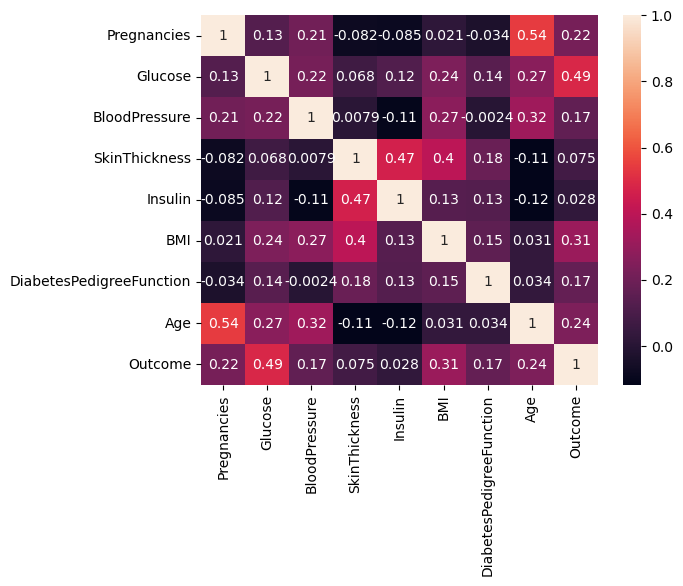

In [33]:
sns.heatmap(df.corr(), annot=True)

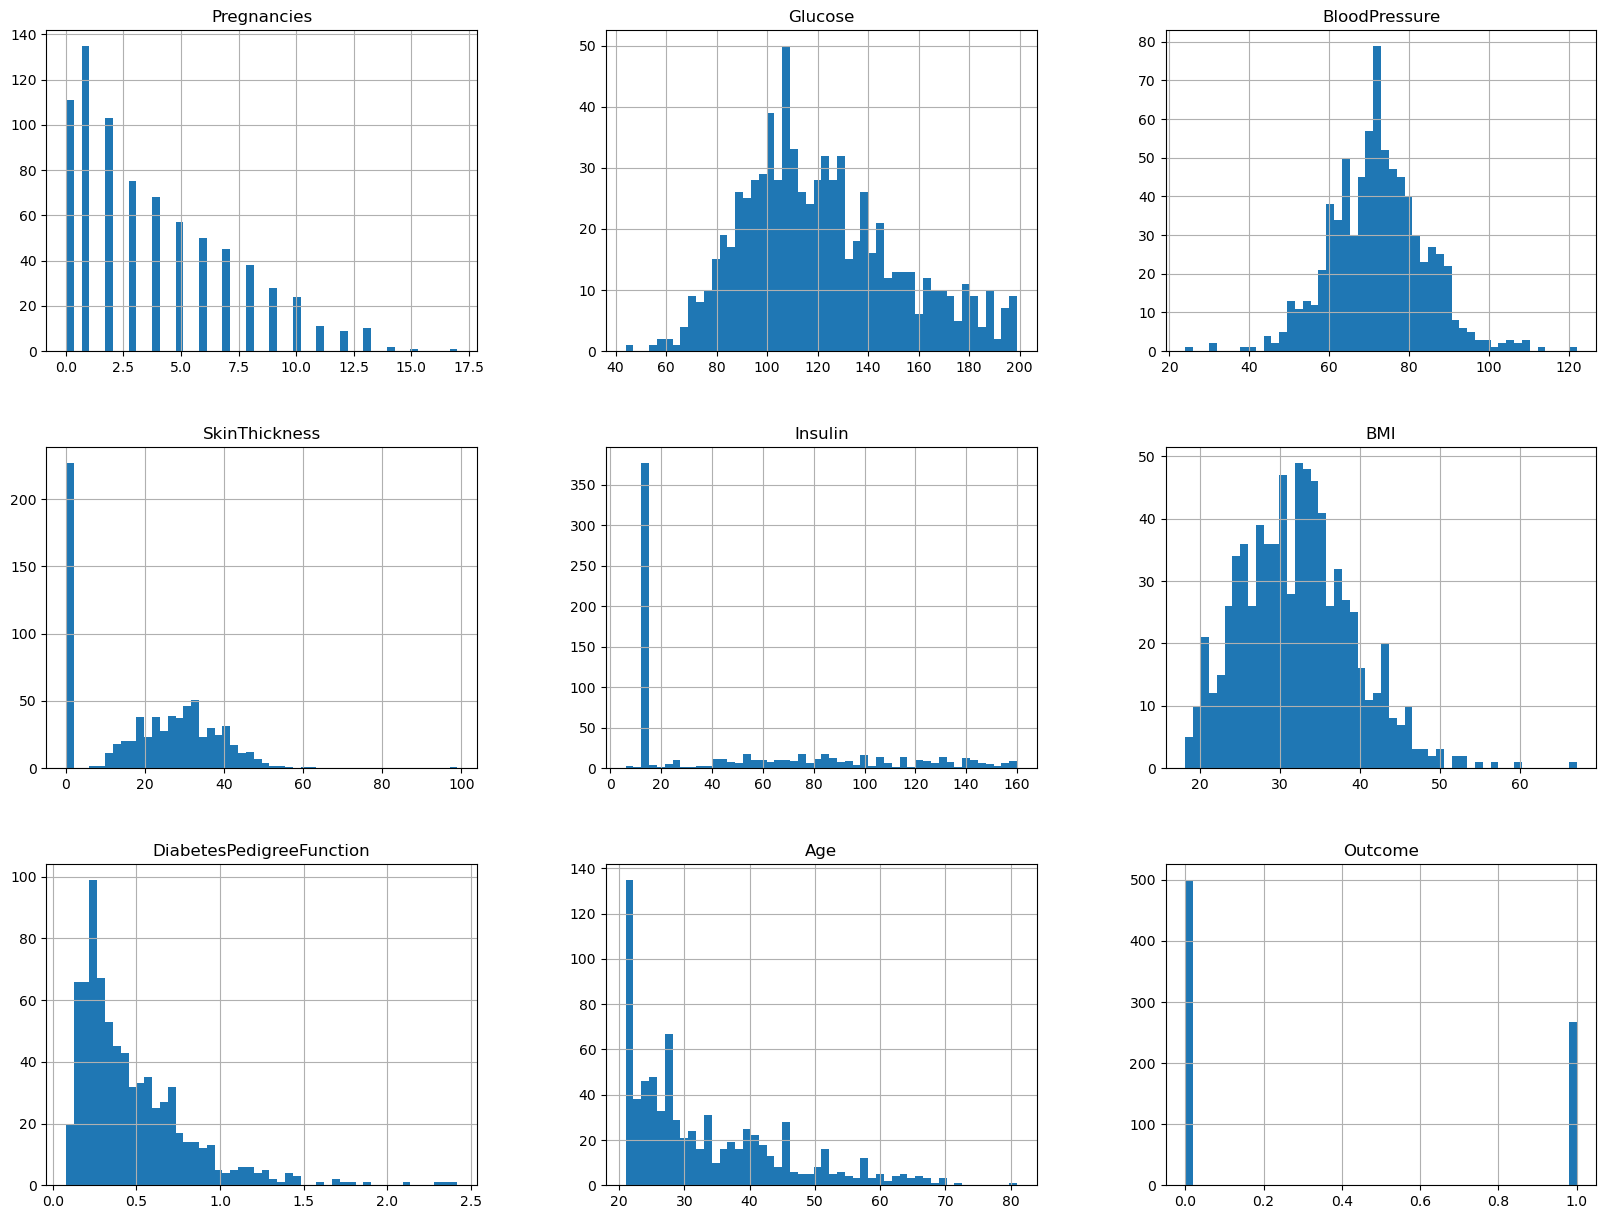

In [34]:
df.hist(bins=50, figsize=(20,15));

#####     Pairplot of dataset - variables relation with Outcome



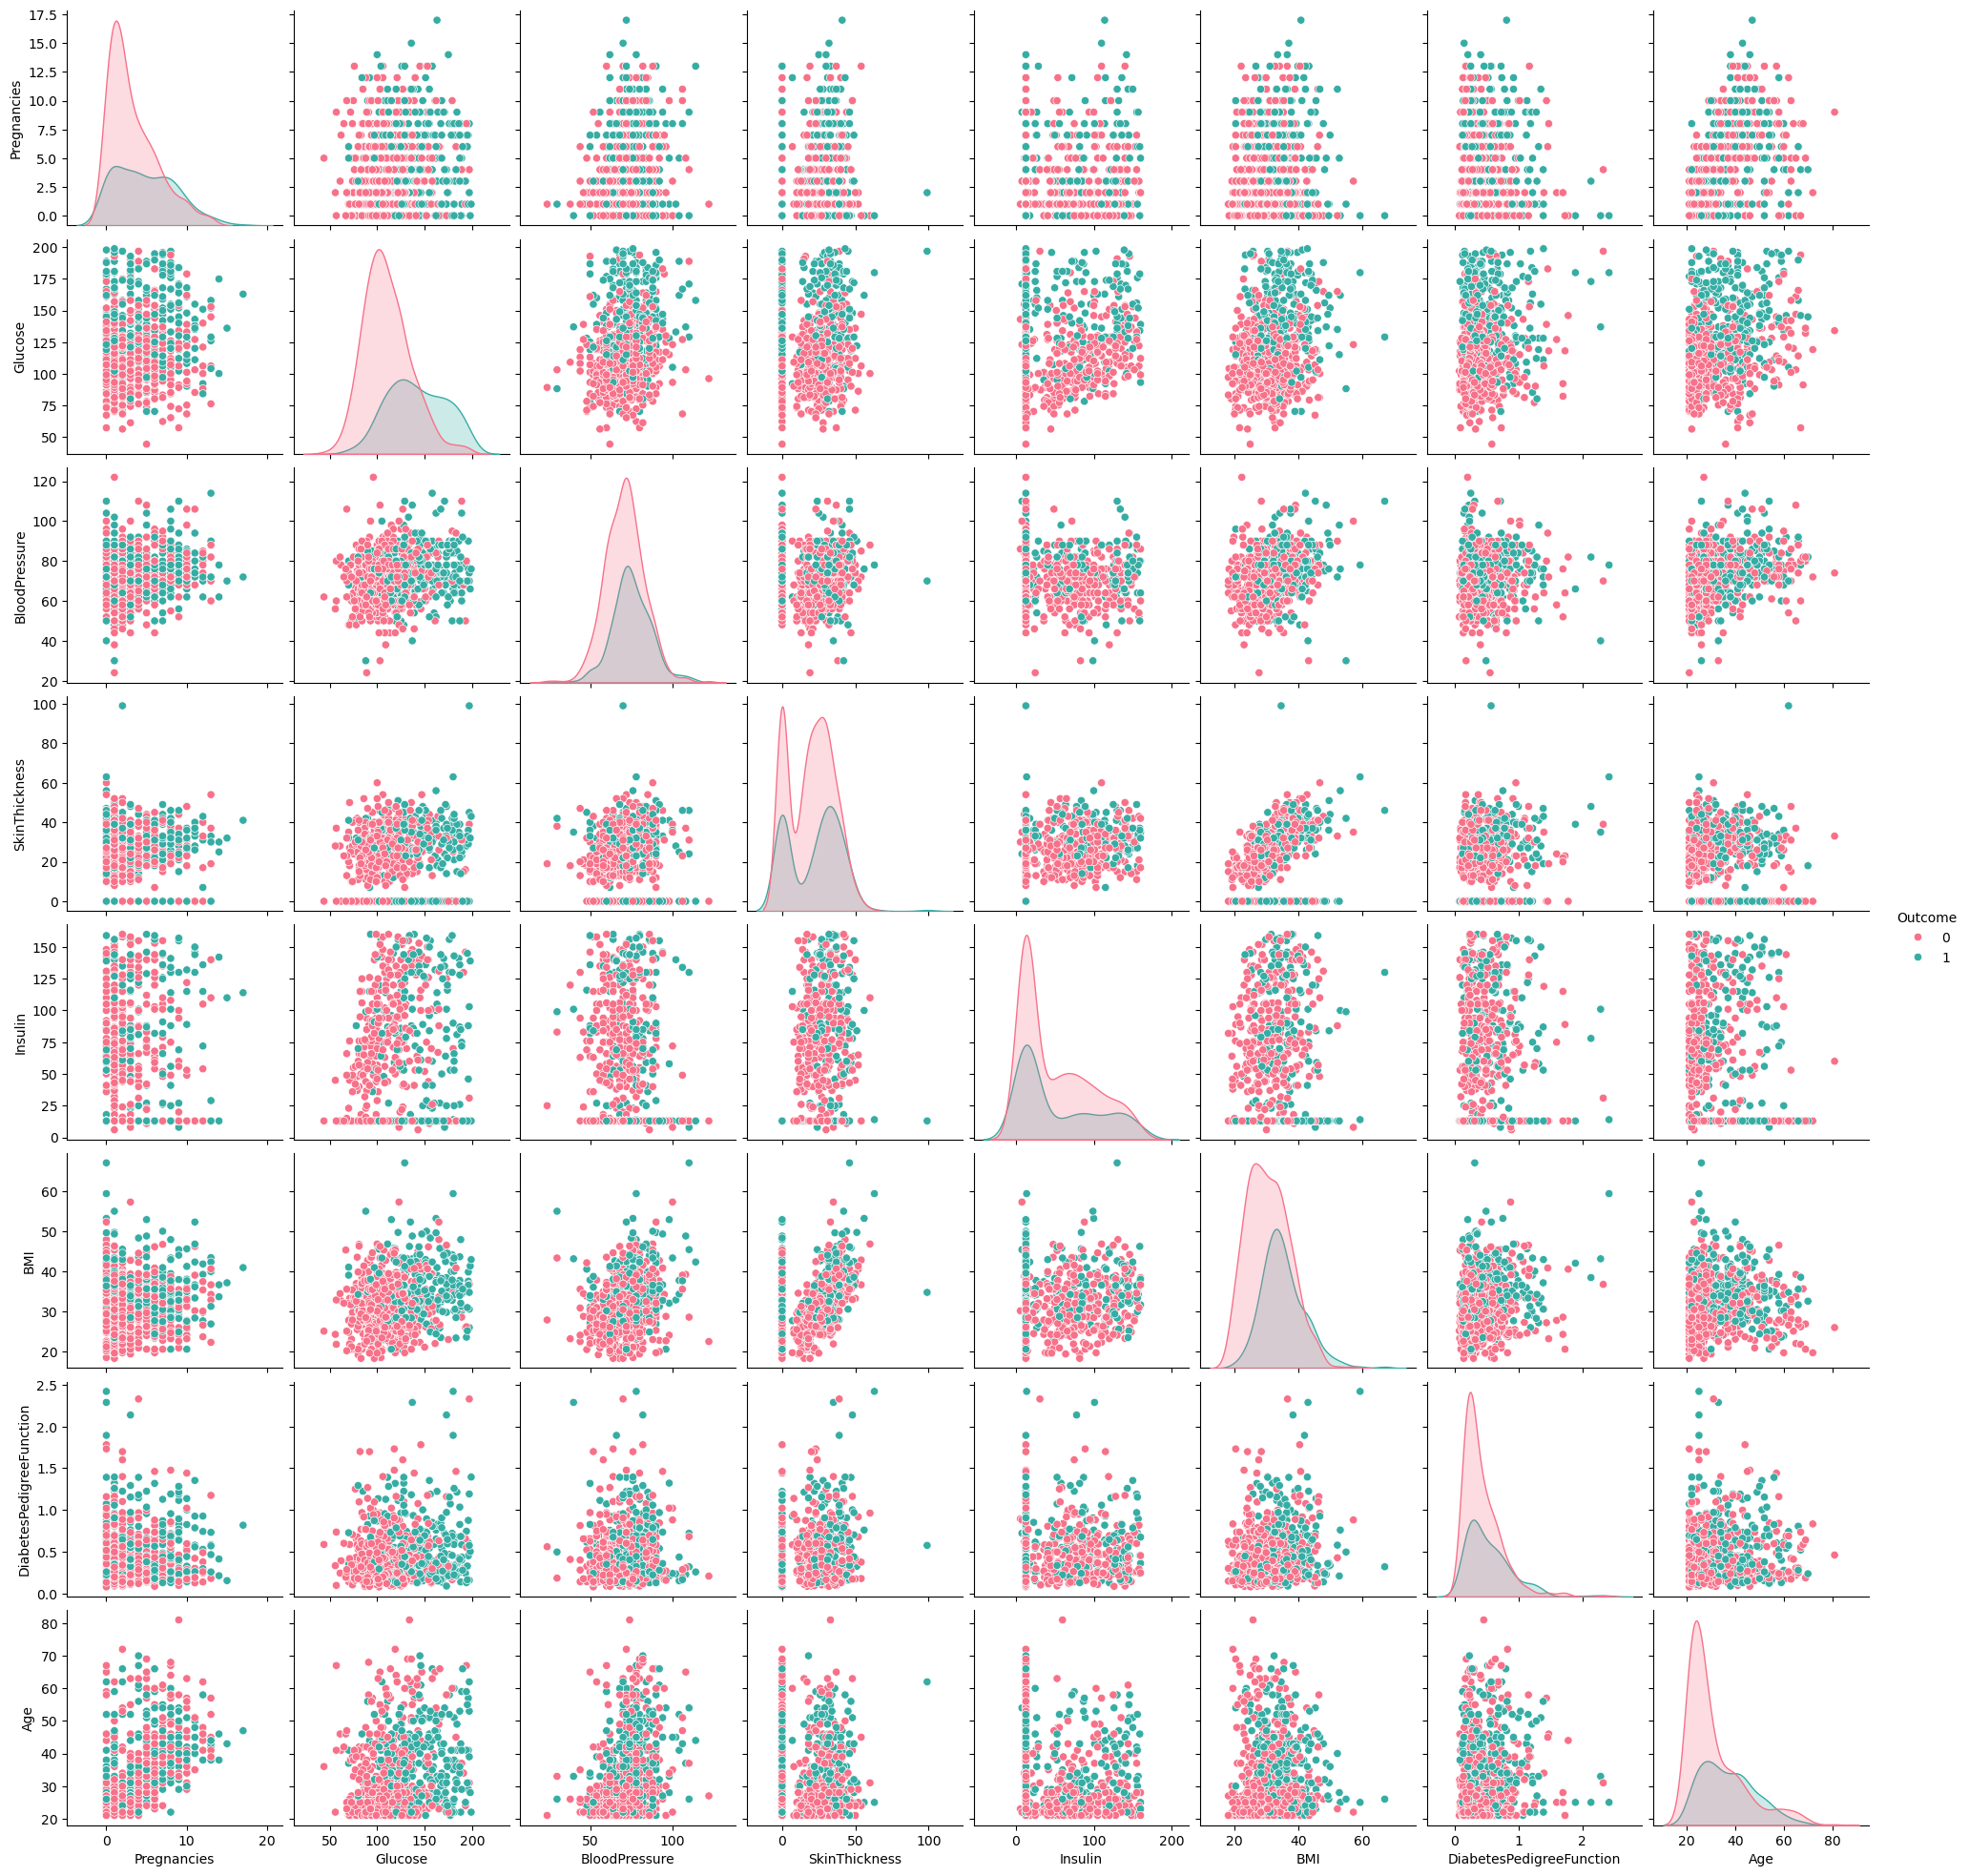

In [36]:
sns.pairplot(df, hue='Outcome', palette="husl")

# Regression

### Splitting Data for Regression

In [39]:
x = df.drop(columns=['DiabetesPedigreeFunction'],axis = 1)
x = x.values
x

array([[  6. , 148. ,  72. , ...,  33.6,  50. ,   1. ],
       [  1. ,  85. ,  66. , ...,  26.6,  31. ,   0. ],
       [  8. , 183. ,  64. , ...,  23.3,  32. ,   1. ],
       ...,
       [  5. , 121. ,  72. , ...,  26.2,  30. ,   0. ],
       [  1. , 126. ,  60. , ...,  30.1,  47. ,   1. ],
       [  1. ,  93. ,  70. , ...,  30.4,  23. ,   0. ]])

In [40]:
y = df.iloc[:,-3].values
y

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.254, 0.205, 0.257,
       0.487, 0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966,
       0.42 , 0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294,
       1.893, 0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467,
       0.718, 0.248, 0.254, 0.962, 1.781, 0.173, 0.304, 0.27 , 0.587,
       0.699, 0.258, 0.203, 0.855, 0.845, 0.334, 0.189, 0.867, 0.411,
       0.583, 0.231, 0.396, 0.14 , 0.391, 0.37 , 0.27 , 0.307, 0.14 ,
       0.102, 0.767, 0.237, 0.227, 0.698, 0.178, 0.324, 0.153, 0.165,
       0.258, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 , 0.323, 0.356,
       0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801, 0.207, 0.287,
       0.336, 0.247, 0.199, 0.543, 0.192, 0.391, 0.588, 0.539, 0.22 ,
       0.654, 0.443, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.261,

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.09, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(698, 8) (70, 8) (698,) (70,)


### Building and Testing Model

In [43]:
from sklearn.linear_model import  LinearRegression, Ridge

In [44]:
li_reg = LinearRegression()
ri_reg = Ridge()

##### Linear Regression:  Multi linear Regression

In [46]:
li_reg.fit(x_train, y_train)

LinearRegression()

In [47]:
li_reg.coef_

array([-0.00604119,  0.00079072, -0.00134826,  0.00322033,  0.000138  ,
        0.0023633 ,  0.00090977,  0.08714354])

In [48]:
y_pred1 = li_reg.predict(x_test)
y_pred1

array([0.49680726, 0.47182656, 0.36886399, 0.30742847, 0.34999958,
       0.49832627, 0.41021192, 0.40529127, 0.50708938, 0.40958601,
       0.49839604, 0.49634902, 0.57706603, 0.41981896, 0.44051952,
       0.64552988, 0.4576034 , 0.42743581, 0.50041737, 0.62253479,
       0.35393205, 0.45241249, 0.49948244, 0.46824899, 0.45459966,
       0.59450437, 0.42958323, 0.37795773, 0.5888588 , 0.41029822,
       0.74353028, 0.51514339, 0.64387047, 0.51568895, 0.39004897,
       0.57794996, 0.88362122, 0.55261579, 0.38173951, 0.50934403,
       0.42177818, 0.43734805, 0.46819877, 0.39201681, 0.27490489,
       0.59889371, 0.64380882, 0.4577111 , 0.34163924, 0.60273841,
       0.40079435, 0.55576716, 0.59675866, 0.46580586, 0.44620384,
       0.42435029, 0.41803358, 0.30642448, 0.50685473, 0.50848519,
       0.56592376, 0.47843162, 0.37022339, 0.43562061, 0.47229408,
       0.58845728, 0.42006769, 0.4585869 , 0.3377581 , 0.70587788])

In [49]:
from sklearn.metrics import r2_score,  mean_squared_error

In [50]:
print("r2_score: ",r2_score(y_test, y_pred1))
print("score: ",li_reg.score(x_train,y_train ))

r2_score:  0.06474035722414362
score:  0.07200140122859044


In [51]:
print(mean_squared_error(y_test, y_pred1))

0.08242835353704053


In [52]:
y_test.mean()

0.4645142857142857

##### Very bad Over fitting, So will use (Ridge model) because it use (L2 regularization)

### Ridge Regression

### choose the best value for alpha

In [56]:
r2 = []
mea = []
for i in range(10,100,10):
    ri_ = Ridge(alpha=i, max_iter=15)
    ri_.fit(x_train, y_train)
    y_pred3 = ri_.predict(x_test)
    r2.append(r2_score(y_test, y_pred3))
    

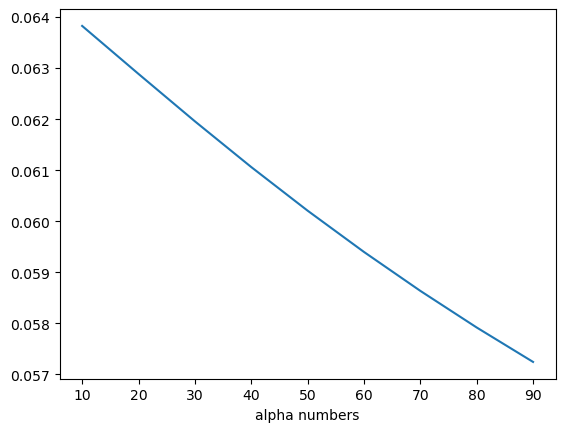

In [57]:
plt.plot(range(10, 100 , 10), r2)
plt.xlabel('alpha numbers')
plt.show()

In [58]:
ri_reg = Ridge(alpha=0.1)
ri_reg.fit(x_train, y_train)
y_pred3 = ri_reg.predict(x_test)

#### Score for prediction

In [60]:
print("Score for prediction:", r2_score(y_test, y_pred3))

Score for prediction: 0.0647315488927026


In [61]:
print("Score for Learning data:", ri_reg.score(x_train,y_train ))

Score for Learning data: 0.07200139228644908


In [62]:
print("MSE:",mean_squared_error(y_test, y_pred3))

MSE: 0.08242912985222071


In [63]:
y_test.mean()

0.4645142857142857

#
# Classification

In [65]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,13,33.6,0.627,50,1
1,1,85,66,29,13,26.6,0.351,31,0
2,8,183,64,0,13,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,101,43.1,2.288,33,1


### Splitting Data for Classification

In [67]:
x_cl = df.drop(columns=['Outcome'],axis = 1)
x_cl = x_cl.values
x_cl

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [68]:
y_cl = df.iloc[:,-1].values
y_cl

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [69]:
x_train_cl, x_test_cl, y_train_cl, y_test_cl = train_test_split(x_cl, y_cl, test_size=0.09, random_state=42)

print(x_train_cl.shape, x_test_cl.shape, y_train_cl.shape, y_test_cl.shape)

(698, 8) (70, 8) (698,) (70,)


### Building and Testing Model

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Try Models Manualy

## Choosing KNN 

### Elpo Method to choose best value for n_neighbors

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
test_error_rates = []

for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k, p =1)
    knn.fit(x_train_cl, y_train_cl) 
   
    y_pred_test = knn.predict(x_test_cl)
    
    test_error = 1 - accuracy_score(y_test_cl,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

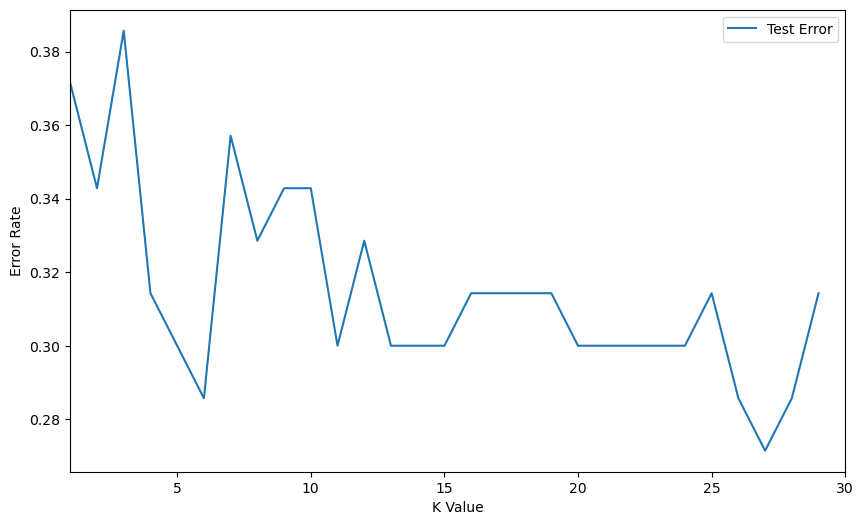

In [76]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.xlim(1,30)
plt.ylabel('Error Rate')
plt.xlabel("K Value")

### Best number is 

In [78]:
knn = KNeighborsClassifier(n_neighbors=11, p=1)
knn.fit(x_train_cl, y_train_cl) 
y_pred_cl1 = knn.predict(x_test_cl)
y_pred_cl1 

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1], dtype=int64)

### Accuracy Score for all test :

In [80]:
accuracy_score(y_test_cl,y_pred_cl1) * 100

70.0

#### confusion_matrix

In [82]:
b = confusion_matrix(y_test_cl,y_pred_cl1)
b

array([[35,  9],
       [12, 14]], dtype=int64)

<Axes: >

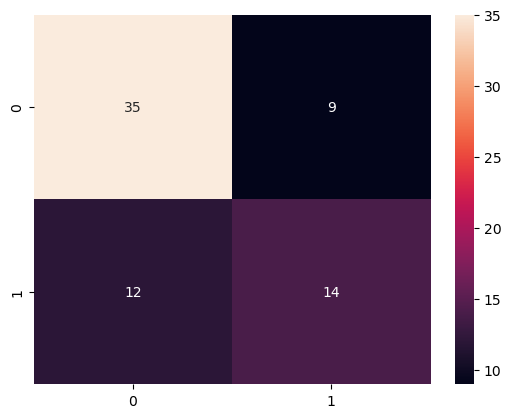

In [83]:
sns.heatmap(b, annot=True)

#### Final Report

In [89]:
print(classification_report(y_test_cl,y_pred_cl1))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        44
           1       0.61      0.54      0.57        26

    accuracy                           0.70        70
   macro avg       0.68      0.67      0.67        70
weighted avg       0.69      0.70      0.70        70



#
## Choosing Logestic Model

In [91]:
log = LogisticRegression(C = 1, max_iter=1000)
log.fit(x_train_cl, y_train_cl)
y_pred_cl2 = log.predict(x_test_cl)
y_pred_cl2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1], dtype=int64)

#### Accuracy Score for all test 

In [93]:
accuracy_score(y_test_cl,y_pred_cl2) *100

77.14285714285715

#### confusion_matrix

In [95]:
a = confusion_matrix(y_test_cl,y_pred_cl2)
a

array([[36,  8],
       [ 8, 18]], dtype=int64)

<Axes: >

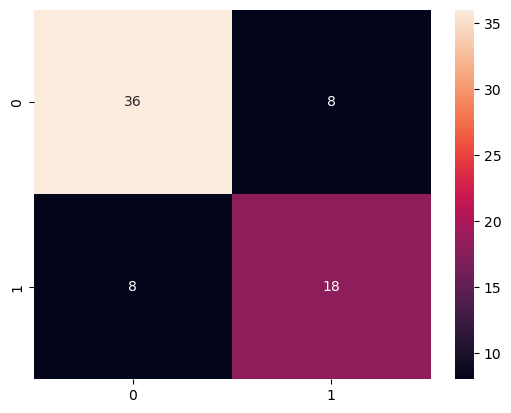

In [96]:
sns.heatmap(a, annot=True)

#### Final Report

In [102]:
print(classification_report(y_test_cl,y_pred_cl2))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        44
           1       0.69      0.69      0.69        26

    accuracy                           0.77        70
   macro avg       0.76      0.76      0.76        70
weighted avg       0.77      0.77      0.77        70



#
### Choosing RandomForstes

In [104]:
r = RandomForestClassifier(n_estimators= 50, max_depth= 2)
r.fit(x_train_cl, y_train_cl)
y_pred_cl4 = r.predict(x_test_cl)
y_pred_cl4

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0], dtype=int64)

#### Accuracy Score for all test 

In [106]:
accuracy_score(y_test_cl,y_pred_cl4) *100

70.0

#### confusion_matrix

In [108]:
s = confusion_matrix(y_test_cl,y_pred_cl4)
s

array([[39,  5],
       [16, 10]], dtype=int64)

In [109]:
print(classification_report(y_test_cl,y_pred_cl4))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        44
           1       0.67      0.38      0.49        26

    accuracy                           0.70        70
   macro avg       0.69      0.64      0.64        70
weighted avg       0.69      0.70      0.68        70



#
# Clustring

In [111]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,13,33.6,0.627,50,1
1,1,85,66,29,13,26.6,0.351,31,0
2,8,183,64,0,13,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,101,43.1,2.288,33,1


In [112]:
df_copy = df.iloc[:,:-1]

In [113]:
x = df.iloc[:,:-1].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [114]:
from sklearn.cluster import KMeans

C:\Users\zas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\zas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\zas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\zas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

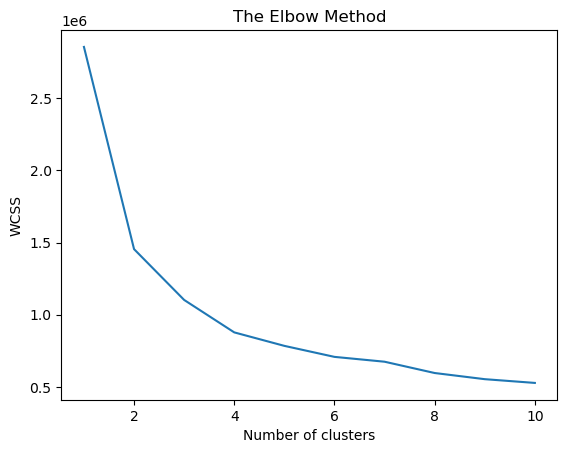

In [115]:

k = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    k.append(kmeans.inertia_)
plt.plot(range(1, 11), k)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [116]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
labels = kmeans.fit_predict(x)
labels

C:\Users\zas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [117]:
df_copy['labels'] = labels
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,labels
0,6,148,72,35,13,33.6,0.627,50,1
1,1,85,66,29,13,26.6,0.351,31,1
2,8,183,64,0,13,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,101,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,53,32.9,0.171,63,1
764,2,122,70,27,13,36.8,0.340,27,1
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,13,30.1,0.349,47,1
